# Visualizing stationary paths of a  functional

Last revised: 02-Feb-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

Consider the functional

$\begin{align}
  S = \int_{x_1}^{x_2} f[y(x), y'(x), x] \, dx
\end{align}$

with $y_1 = y(x_1)$ and $y_2 = y(x_2)$ fixed.  We denote by $y^*(x)$ the path that minimizes $S$ (or, more generally, makes it stationary).  Then we consider the class of candidate paths $y(x)$ given by

$\begin{align}
  y(x) = y^*(x) + \alpha \eta(x)
\end{align}$

where $\eta(x)$ is some function that vanishes at the endpoints: $\eta(x_1) = \eta(x_2) = 0$.  We can derive the Euler-Lagrange equations by minimizing $S(\alpha)$ with respect to $\alpha$.  

Here we visualize this problem by considering a particular $S$, choosing among some possible $\eta(x)$ definitions, and seeing how $S$ is minimized with respect to $\alpha$.  We will also allow for an incorrect determination of $y^*(x)$, in which case we expect that the minimum alpha will give us a reasonable reproduction of the true $y^*(x)$.  The variation of $\alpha$ and the choice of functions will be made using widgets from `ipywidgets`.



## Looking at a plot of the functional evaluation versus $\alpha$

\[We'll use `%matplotlib notebook` so that we can modify figures without redrawing them.\]

In [4]:
%matplotlib notebook

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display


### Functional from Taylor problem 6.12

This problem states: "Find the equation of the path from the origin $O$ to the point $P(1,1)$ in the $xy$ plane that makes the integral $\int_O^P x (1 + y'^2)$ stationary.  The answer from solving the Euler-Lagrange equation is $y^*(x) = \sinh (x + 1) C$.

In [8]:
def y_star(x):
    """Path that minimizes the functional in Taylor problem 6.9."""
    return np.arcsinh(x + 1)

<IPython.core.display.Javascript object>


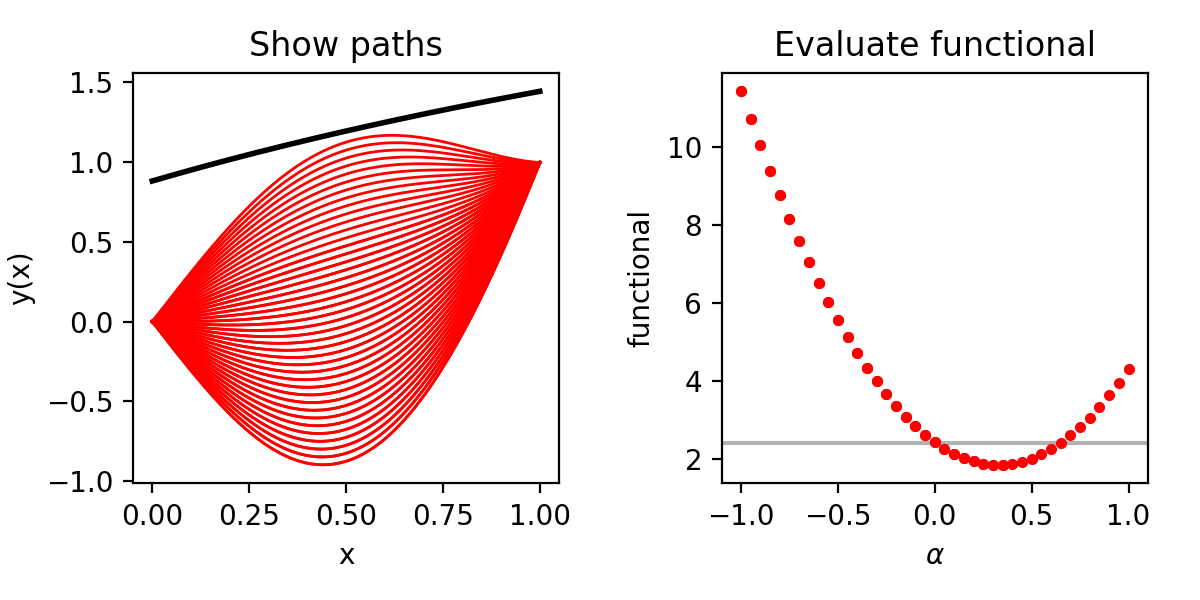

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\alpha$', max=1.0, min=-1…

Button(description='reset graph', style=ButtonStyle())

In [11]:
delta_x = 0.001
x_pts = np.arange(0., 1., delta_x)

fig = plt.figure(figsize=(6,3), 
                 num='Visualizing stationary paths of a functional')
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def setup_figure():
    ax1.set_title('Show paths')
    ax1.plot(x_pts, y_star(x_pts), color='black', lw=2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y(x)')
    
    ax2.set_title('Evaluate functional')
    ax2.set_xlabel(r'$\alpha$')
    ax2.set_ylabel('functional')
    #ax2.set_xlim(-0.4, 0.4)
    #ax2.set_ylim(1.5, 3.)
    #ax2.axvline(0., color='black', alpha=0.3)
    ax2.axhline(evaluate_functional(x_pts, y_star(x_pts)), 
                                    color='black', alpha=0.3)
    
    fig.tight_layout()

def evaluate_functional(x_pts, y_pts):
    """Given arrays of x and y points, evaluate the functional from 6.9."""
    # The numpy gradient function takes the derivative of an array y_pts
    #  that is a function of points x in x_pts.
    y_deriv_pts = np.gradient(y_pts, x_pts)
    f = y_deriv_pts**2 + y_pts * y_deriv_pts + y_pts**2
    
    # Use the numpy trapezoid rule (trapz) to do the integral over f.
    return np.trapz(f, x_pts)

def make_path(alpha, ax1_passed, ax2_passed,
              base_function='exact', eta_function='sine'):
    """Given a base function, which may be the exact y^*(x) or a guess that
       is not correct, generate and plot the path corresponding to adding
       alpha*eta(x) to the base function, with eta(x) chosen among some
       functions that vanish at the endpoints in x.
    """
    # map x_pts to zero to 1 (it may already be there)
    x_mapped_pts = (x_pts - x_pts[0]) / (x_pts[-1] - x_pts[0])

    # Choices for the base function
    if (base_function == 'exact'):
        base = lambda x : y_star(x)
    elif (base_function == 'guess 1'):
        base = lambda x : np.arcsinh(2.*x) / np.arcsinh(2.)
    elif (base_function == 'guess 2'):
        base = lambda x : x**3
    
    if (eta_function == 'sine'):
        eta = lambda x : np.sin(np.pi * x)
    elif (eta_function == 'parabola'):
        eta = lambda x : 4. * x * (1. - x)

    y_new_pts = base(x_pts) + alpha * eta(x_mapped_pts)

    ax1_passed.plot(x_pts, y_new_pts, color='red', lw=1)
    ax2_passed.plot(alpha, evaluate_functional(x_pts, y_new_pts), '.',
                    color='red')

def reset_graph(event):
    ax1.clear()
    ax2.clear()
    setup_figure()
    
button = widgets.Button(
    description='reset graph'
)
button.on_click(reset_graph)
 
widgets.interact(make_path, 
                 alpha=widgets.FloatSlider(min=-1., max=1., step=.05,
                                           value=0.0, description=r'$\alpha$', 
                                           continuous_update=False), 
                 ax1_passed=widgets.fixed(ax1), 
                 ax2_passed=widgets.fixed(ax2),
                 base_function=widgets.Dropdown(options=['exact', 'guess 1',
                                                         'guess 2'],
                                                value='exact',
                                                description='base function'),
                 eta_function=widgets.Dropdown(options=['sine', 'parabola'],
                                               value='sine',
                                               description=r'$\eta(x)$')
                )

setup_figure()    
button